<a href="https://colab.research.google.com/github/mwrdi0804/Prep_Intern_II/blob/main/INTERN_PREP_PART_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
sales_path = 'https://drive.google.com/uc?export=download&id=1bmqysj0xfJKoc_0065LUmSZPNooH7hXP'
product_path = 'https://drive.google.com/uc?export=download&id=1L0FncMN7kW69oszVTd4hA2-P0Xd02bNC'
region_path = 'https://drive.google.com/uc?export=download&id=1WoHyMi32wr5CEPZpJXUX6TweTt7LZiBP'

sales = pd.read_csv(sales_path)
product = pd.read_csv(product_path)
region = pd.read_csv(region_path)

merged_sales_product = pd.merge(sales, product, on='product_key', how='inner')

merged_data = pd.merge(merged_sales_product, region, on='sales_teritory_key', how='inner')

final_data = pd.DataFrame(merged_data)

# Menghapus simbol $ dan mengubah tipe data menjadi float
final_data[['unit_price', 'sales', 'cost', 'standard_cost', 'quantity']] = final_data[['unit_price', 'sales', 'cost', 'standard_cost', 'quantity']].replace('[\$,]', '', regex=True).astype(float)

final_data = final_data.rename(columns={'name_x': 'product_name', 'name_y': 'region_name'})

print(final_data)

# Pastikan kolom cost dan quantity memiliki tipe data yang benar
final_data[['cost', 'quantity']] = final_data[['cost', 'quantity']].astype(float)

# Menambahkan kolom 'actual_cost'
final_data['actual_cost'] = final_data['cost'] / final_data['quantity']

print(final_data.info())


# duplikat = df[df.duplicated()]
# print('baris duplikat')
# print(duplikat)

# missing_data = df.isnull().sum()
# print('missing data')
# print(missing_data)

       sales_key sales_order_number  order_date  product_key  reseller_key  \
0              1            SO43897  2017-08-25          235           312   
1              2            SO43897  2017-08-25          351           312   
2              3            SO43897  2017-08-25          348           312   
3              4            SO43897  2017-08-25          232           312   
4              5            SO44544  2017-11-18          292           312   
...          ...                ...         ...          ...           ...   
57846      57847            SO69476  2020-05-15          476           667   
57847      57848            SO69476  2020-05-15          474           667   
57848      57849            SO69493  2020-05-18          482            89   
57849      57850            SO69503  2020-05-20          482            79   
57850      57851            SO69561  2020-05-31          474           546   

       employee_key  sales_teritory_key  quantity  unit_price  

<Axes: xlabel='unit_price', ylabel='Count'>

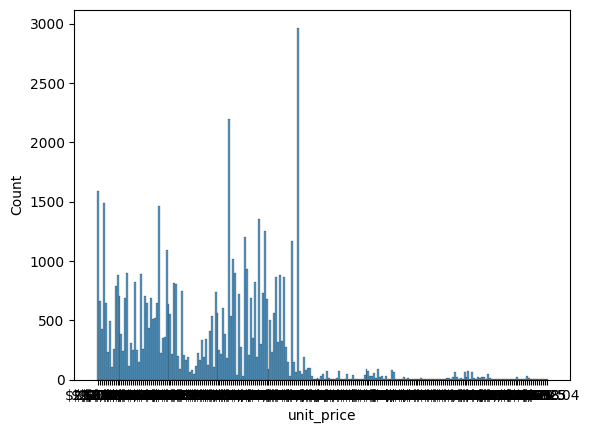

In [3]:
sns.histplot(merged_data['unit_price'])

             unit_price  actual_cost  median_profit
category                                           
Accessories       20.19    13.086099     -35.185245
Bikes            672.29   713.080000       6.067322
Clothing          29.99    26.176429     -12.716143
Components       183.94   170.143333      -7.500634


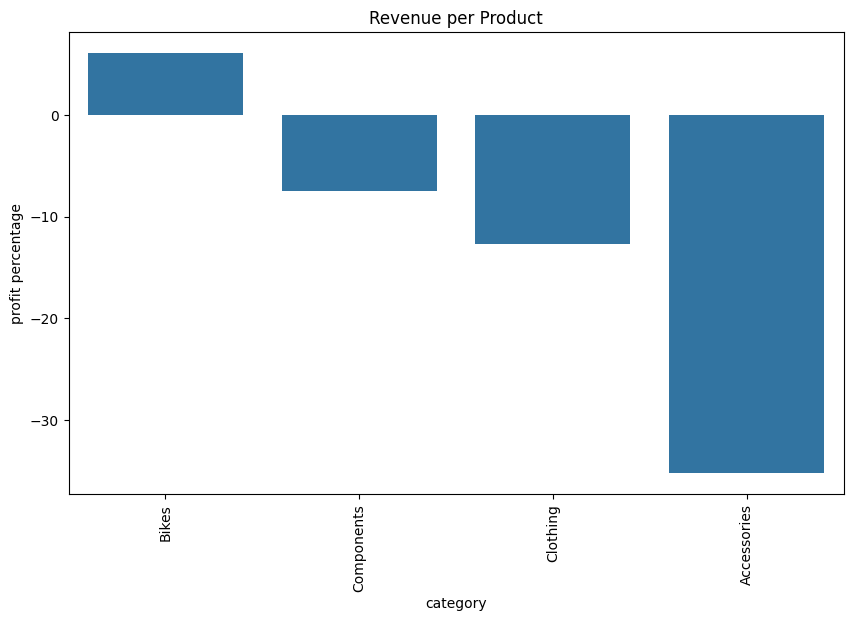

In [4]:
# Profit percentage
median_values = final_data.groupby('category')[['unit_price','actual_cost']].median()

median_values['median_profit'] = (median_values['actual_cost'] - median_values['unit_price'])/ median_values['unit_price'] *100

print(median_values)

# median_values = df.groupby('category')[['cost','unit_price']].apply(lambda x: x.mode().iloc[0])

# profit_per_product['median_profit'] = median_values['cost'] - median_values['unit_price']

# print(profit_per_product)

# Mengurutkan median_values berdasarkan 'median_profit' dari besar ke kecil
median_values_sorted = median_values.sort_values(by='median_profit', ascending=False)

# Membuat barplot untuk profit terhadap product_name
plt.figure(figsize=(10, 6))
sns.barplot(x=median_values_sorted.index, y='median_profit', data=median_values_sorted)

plt.xlabel('category')
plt.ylabel('profit percentage')
plt.title('Revenue per Product')

plt.xticks(rotation=90)
plt.show()


    year  month     profit
0   2017      7   17033.10
1   2017      8   70612.20
2   2017      9   57849.09
3   2017     10   27702.79
4   2017     11   89691.23
5   2017     12   70357.20
6   2018      1   22799.89
7   2018      2   70313.56
8   2018      3   58512.97
9   2018      4   28364.85
10  2018      5   87881.91
11  2018      6 -469756.42
12  2018      7   73557.49
13  2018      8  147087.86
14  2018      9  158759.87
15  2018     10   79659.01
16  2018     11  135875.74
17  2018     12  114696.70
18  2019      1   51206.49
19  2019      2   77988.86
20  2019      3   66744.80
21  2019      4   86095.95
22  2019      5  117090.75
23  2019      6  102784.47
24  2019      7 -118341.29
25  2019      8 -157244.56
26  2019      9 -172100.02
27  2019     10    7853.14
28  2019     11   29682.42
29  2019     12   37011.23
30  2020      1    6225.06
31  2020      2   14284.23
32  2020      3    9172.93
33  2020      4   12331.19
34  2020      5  -12290.12


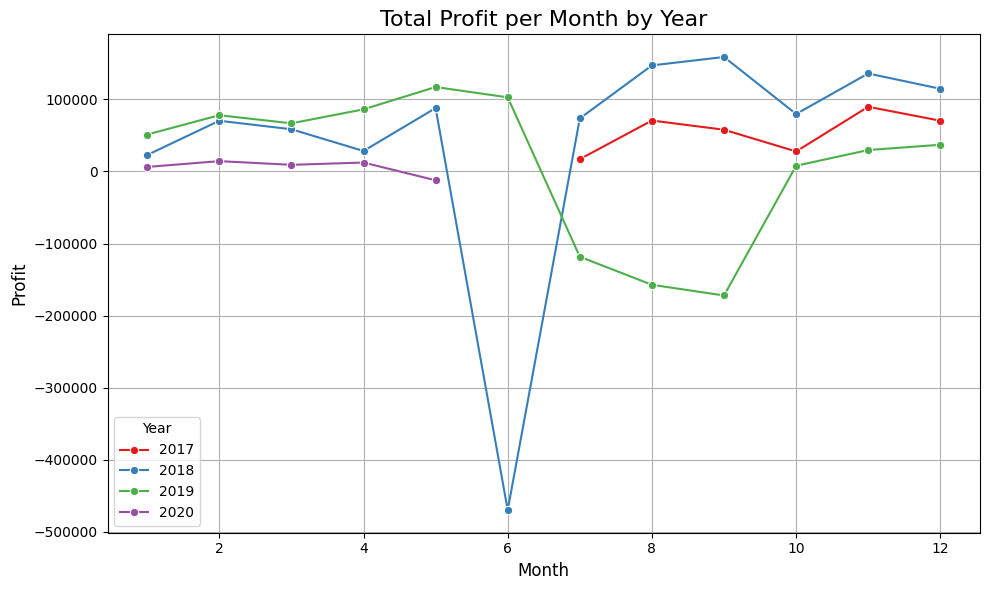

In [5]:
# Pastikan kolom 'actual_cost' sudah ada (jika belum, buat kolom tersebut)
final_data['actual_cost'] = final_data['cost'] / final_data['quantity']

# Mengcopy kolom yang diperlukan untuk perhitungan profit
monthly_profit = final_data[['order_date', 'quantity', 'sales', 'actual_cost']].copy()

# Menghitung profit per transaksi
monthly_profit['profit'] = monthly_profit['sales'] - (monthly_profit['quantity'] * monthly_profit['actual_cost'])

# Pastikan kolom 'order_date' sudah dalam format datetime
monthly_profit['order_date'] = pd.to_datetime(monthly_profit['order_date'])

# Menambahkan kolom bulan dan tahun berdasarkan 'order_date'
monthly_profit['month'] = monthly_profit['order_date'].dt.month
monthly_profit['year'] = monthly_profit['order_date'].dt.year

# Mengelompokkan data berdasarkan bulan dan tahun untuk menghitung total profit
monthly_profit_total = monthly_profit.groupby(by=['year', 'month']).agg({'profit': 'sum'}).reset_index()

# Menampilkan hasil
print(monthly_profit_total)

# Membuat line chart per bulan dan tahun dengan Seaborn
plt.figure(figsize=(10, 6))  # Menentukan ukuran plot

# Plot dengan hue berdasarkan tahun, sumbu X berdasarkan bulan, dan sumbu Y berdasarkan profit
sns.lineplot(data=monthly_profit_total, x='month', y='profit', hue='year',
             marker='o', palette='Set1')

# Menambahkan judul dan label sumbu
plt.title('Total Profit per Month by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(True)

# Menambahkan legend untuk memudahkan identifikasi tahun
plt.legend(title='Year')

# Menyesuaikan jarak antar label pada sumbu X agar tidak terlalu padat
plt.tight_layout()  # Mengatur layout agar tidak terpotong

# Menampilkan plot
plt.show()


In [6]:
# Menghitung profit margin per transaksi
final_data['profit_margin'] = (final_data['sales'] - final_data['cost']) / final_data['sales'] * 100

# Mengelompokkan berdasarkan region, country, dan group
# Misalkan ada kolom 'region_name', 'country_name', dan 'group_name' dalam dataset
profit_margin_region = final_data.groupby('region_name')['profit_margin'].mean().reset_index()
profit_margin_country = final_data.groupby('country')['profit_margin'].mean().reset_index()
profit_margin_group = final_data.groupby('group')['profit_margin'].mean().reset_index()

# Menampilkan hasil
print("Profit Margin per Region")
print(profit_margin_region)

print("\nProfit Margin per Country")
print(profit_margin_country)

print("\nProfit Margin per Group")
print(profit_margin_group)


Profit Margin per Region
      region_name  profit_margin
0       Australia       3.003170
1          Canada       9.907512
2         Central       8.539434
3          France      10.209982
4         Germany       5.285385
5       Northeast       8.753021
6       Northwest       9.313986
7       Southeast       9.185504
8       Southwest       8.710733
9  United Kingdom       9.962533

Profit Margin per Country
          country  profit_margin
0       Australia       3.003170
1          Canada       9.907512
2          France      10.209982
3         Germany       5.285385
4  United Kingdom       9.962533
5   United States       8.885921

Profit Margin per Group
           group  profit_margin
0         Europe       9.122768
1  North America       9.118220
2        Pacific       3.003170


Top 10 Products by Profit
                     product_name        profit
0          Mountain-200 Black, 38  78713.100915
1          Mountain-200 Black, 42  66473.840555
2         Mountain-200 Silver, 38  59365.331666
3         Mountain-200 Silver, 42  57501.331161
4         Mountain-200 Silver, 46  56602.237247
5          Mountain-200 Black, 46  51603.382007
6  HL Mountain Frame - Silver, 38  38573.716663
7   HL Mountain Frame - Black, 42  37354.015429
8  HL Mountain Frame - Silver, 46  22973.024631
9   HL Mountain Frame - Black, 38  22828.708167


<ipython-input-7-c939b1737cd3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='product_name', y='profit', palette='viridis')


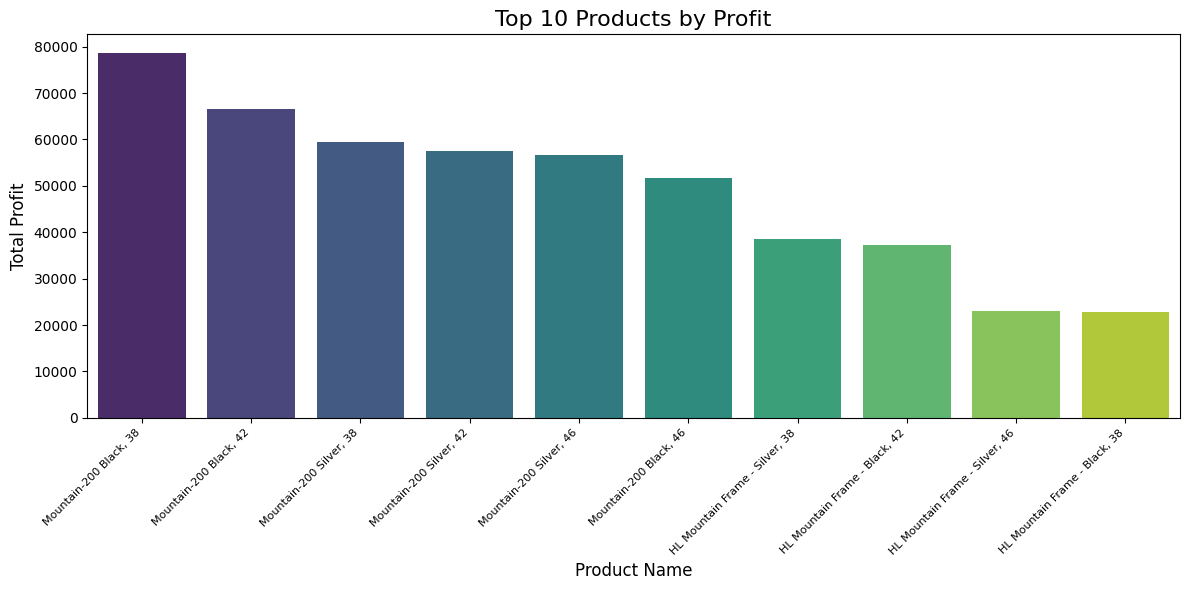

In [7]:
# Menghitung kolom 'profit'
final_data['profit'] = final_data['unit_price'] - final_data['actual_cost']

# Menampilkan 10 produk teratas berdasarkan profit di seluruh data
top_10_products = final_data.groupby('product_name')['profit'].sum().nlargest(10).reset_index()

# Menampilkan produk dengan profit tertinggi
print("Top 10 Products by Profit")
print(top_10_products)

# Membuat horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='product_name', y='profit', palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('Top 10 Products by Profit', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)

# Menampilkan grafik
plt.xticks(fontsize = 8, rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Axes: xlabel='unit_price', ylabel='Count'>

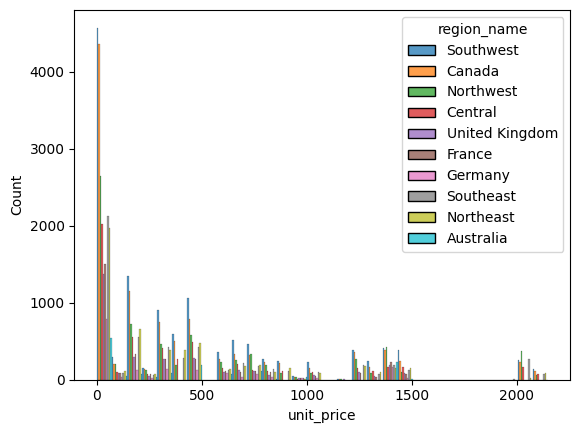

In [8]:
sns.histplot(final_data, x='unit_price', hue='region_name', multiple='dodge', bins=30)

                unit_price  actual_cost  median_profit_percentage
region_name                                                      
Australia           334.06   461.440000                 38.130875
United Kingdom      200.05   185.820000                 -7.113222
Canada              202.33   187.156667                 -7.499300
Germany             158.43   144.590000                 -8.735719
Central             323.99   294.580000                 -9.077441
Northwest           323.99   294.580000                 -9.077441
Southeast           323.99   294.580000                 -9.077441
Southwest           323.99   294.580000                 -9.077441
Northeast           234.90   204.630000                -12.886335
France              180.13   145.282917                -19.345519


<ipython-input-9-db04949fa04f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_values_region, x=median_values_region.index, y='median_profit_percentage', palette='Set1')


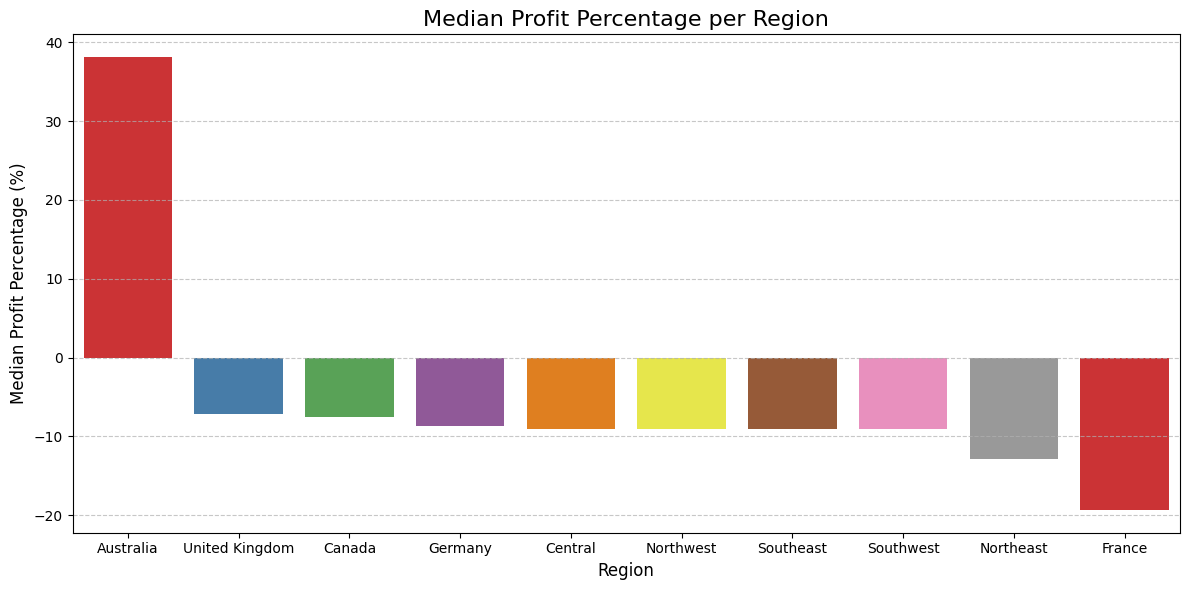

In [9]:
# Menghitung median untuk 'unit_price' dan 'actual_cost' per region
median_values_region = final_data.groupby('region_name')[['unit_price', 'actual_cost']].median()

# Menghitung profit percentage
median_values_region['median_profit_percentage'] = (median_values_region['actual_cost'] - median_values_region['unit_price']) / median_values_region['unit_price'] * 100

# Mengurutkan berdasarkan median_profit_percentage dari terbesar
median_values_region = median_values_region.sort_values(by='median_profit_percentage', ascending=False)

# Menampilkan hasil untuk region
print(median_values_region)

# Membuat barplot untuk median profit percentage per region
plt.figure(figsize=(12, 6))

sns.barplot(data=median_values_region, x=median_values_region.index, y='median_profit_percentage', palette='Set1')

# Menambahkan judul dan label sumbu
plt.title('Median Profit Percentage per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Median Profit Percentage (%)', fontsize=12)

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()


<Axes: xlabel='unit_price', ylabel='Count'>

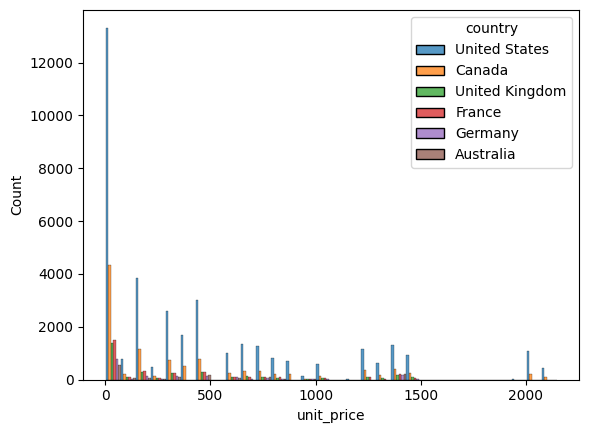

In [10]:
sns.histplot(final_data, x='unit_price', hue='country', multiple='dodge', bins=30)

                unit_price  actual_cost  median_profit_percentage
country                                                          
Australia           334.06   461.440000                 38.130875
United Kingdom      200.05   185.820000                 -7.113222
Canada              202.33   187.156667                 -7.499300
Germany             158.43   144.590000                 -8.735719
United States       323.99   294.580000                 -9.077441
France              180.13   145.282917                -19.345519


<ipython-input-11-0f364ba1efd0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_values_country, x=median_values_country.index, y='median_profit_percentage', palette='Set2')


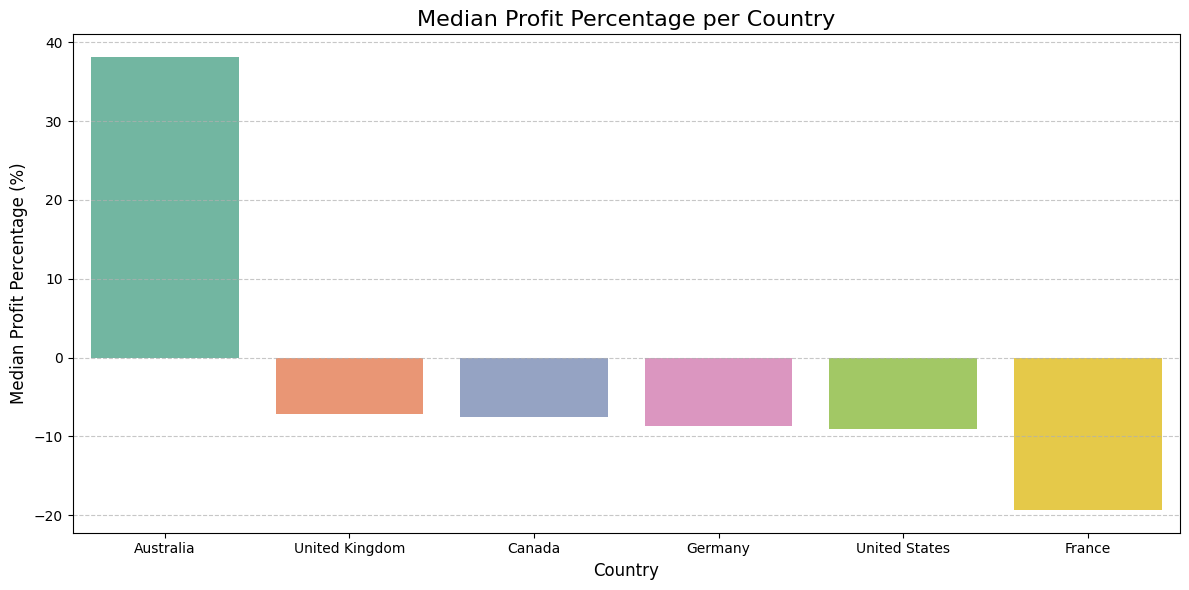

In [11]:
# Menghitung median untuk 'unit_price' dan 'actual_cost' per country
median_values_country = final_data.groupby('country')[['unit_price', 'actual_cost']].median()

# Menghitung profit percentage
median_values_country['median_profit_percentage'] = (median_values_country['actual_cost'] - median_values_country['unit_price']) / median_values_country['unit_price'] * 100

# Mengurutkan berdasarkan median_profit_percentage dari terbesar
median_values_country = median_values_country.sort_values(by='median_profit_percentage', ascending=False)

# Menampilkan hasil untuk country
print(median_values_country)

# Membuat barplot untuk median profit percentage per country
plt.figure(figsize=(12, 6))

sns.barplot(data=median_values_country, x=median_values_country.index, y='median_profit_percentage', palette='Set2')

# Menambahkan judul dan label sumbu
plt.title('Median Profit Percentage per Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Median Profit Percentage (%)', fontsize=12)

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()


<Axes: xlabel='unit_price', ylabel='Count'>

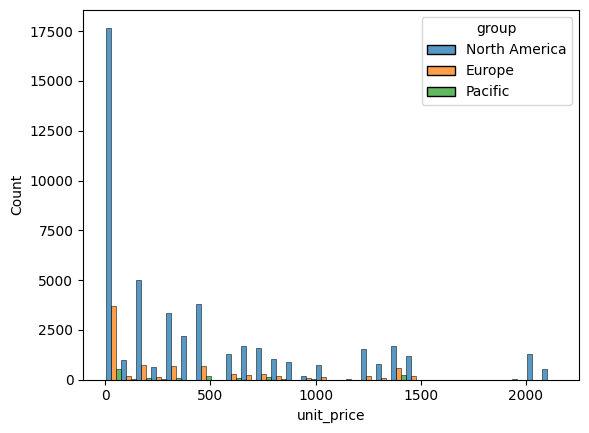

In [12]:
sns.histplot(final_data, x='unit_price', hue='group', multiple='dodge', bins=30)

               unit_price  actual_cost  median_profit_percentage
group                                                           
Pacific            334.06   461.440000                 38.130875
North America      218.45   204.626667                 -6.327916
Europe             183.94   170.140000                 -7.502446


<ipython-input-13-c97946bc0662>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_values_group, x=median_values_group.index, y='median_profit_percentage', palette='Set1')


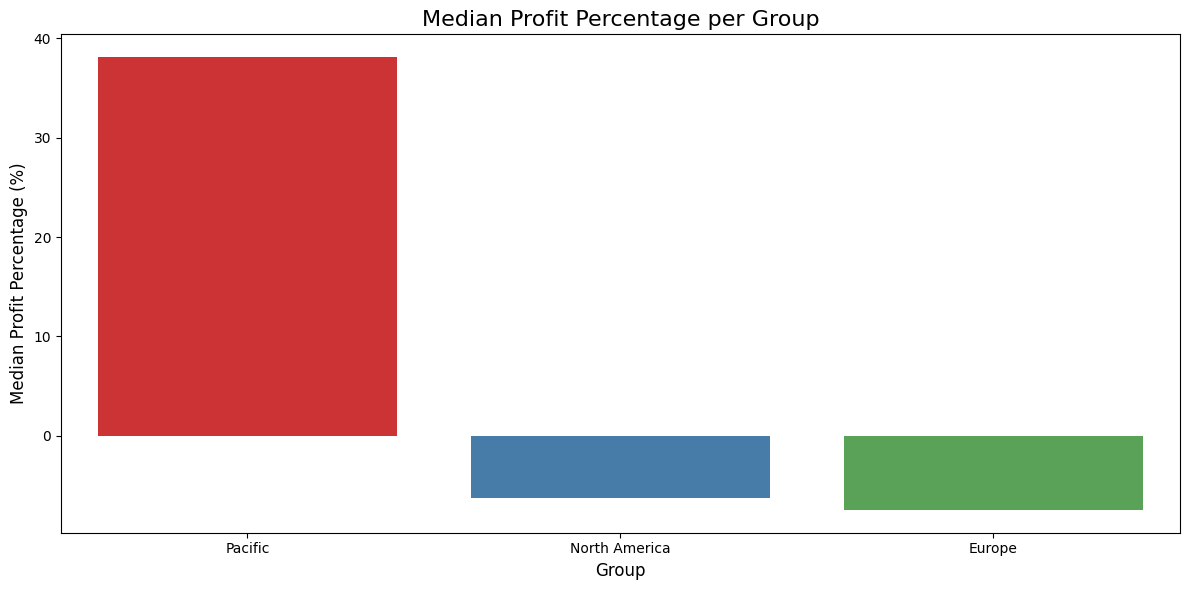

In [13]:
# Menghitung median untuk 'unit_price' dan 'actual_cost' per group
median_values_group = final_data.groupby('group')[['unit_price', 'actual_cost']].median()

# Menghitung profit percentage
median_values_group['median_profit_percentage'] = (median_values_group['actual_cost'] - median_values_group['unit_price']) / median_values_group['unit_price'] * 100

# Mengurutkan berdasarkan median_profit_percentage dari terbesar
median_values_group = median_values_group.sort_values(by='median_profit_percentage', ascending=False)

# Menampilkan hasil untuk group
print(median_values_group)

# Membuat barplot untuk median profit percentage per group
plt.figure(figsize=(12, 6))

sns.barplot(data=median_values_group, x=median_values_group.index, y='median_profit_percentage', palette='Set1')

# Menambahkan judul dan label sumbu
plt.title('Median Profit Percentage per Group', fontsize=16)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Median Profit Percentage (%)', fontsize=12)

# Menampilkan grafik
plt.tight_layout()
plt.show()


       quantity  unit_price  actual_cost  profit
0           2.0       28.84    31.725000   -5.77
1           2.0     2024.99  1898.095000  253.79
2           2.0     2024.99  1898.095000  253.79
3           2.0       28.84    31.725000   -5.77
4           2.0      818.70   706.810000  223.78
...         ...         ...          ...     ...
57846      21.0       38.49    26.176190  258.59
57847      19.0       38.49    26.176316  233.96
57848      20.0        4.94     3.362500   31.55
57849      23.0        4.94     3.362174   36.29
57850      26.0       35.00    26.176154  229.42

[57851 rows x 4 columns]


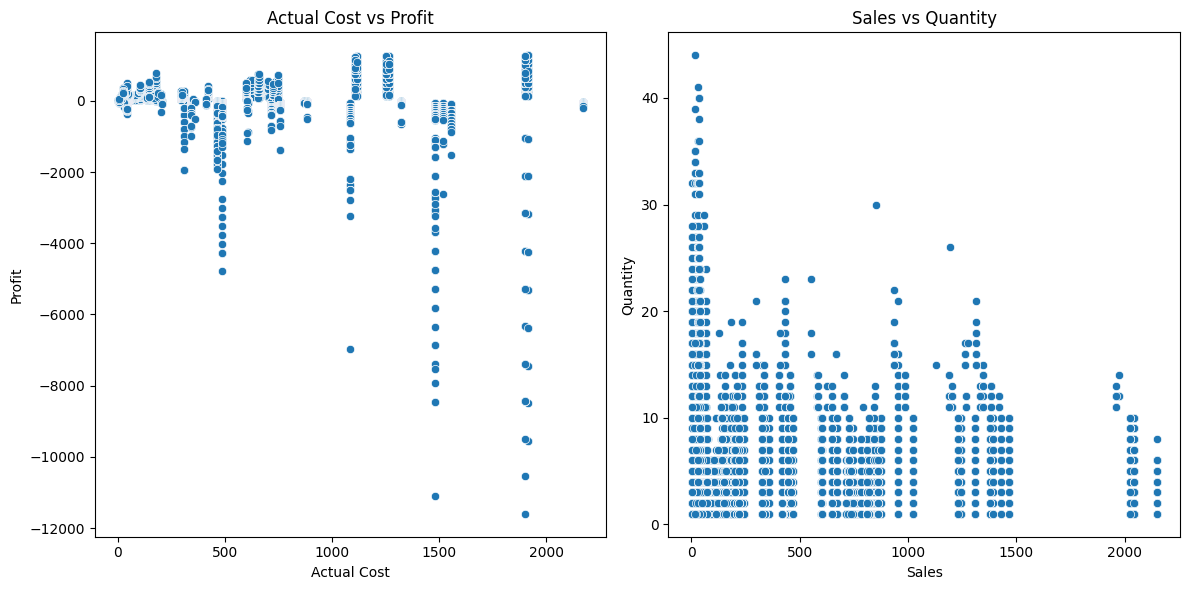

In [14]:
orders_product_filtered = final_data[['quantity', 'unit_price', 'actual_cost']].dropna()

# Menghitung profit per transaksi
cost_correlation = orders_product_filtered.copy()

# Menghitung profit
cost_correlation['profit'] = (cost_correlation['unit_price'] - cost_correlation['actual_cost']) * cost_correlation['quantity']

print(cost_correlation)

# Membuat figure dengan dua subplot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot 1: Sumbu X = actual_cost (Cost Price Per Unit), Sumbu Y = profit
sns.scatterplot(data=cost_correlation, x='actual_cost', y='profit', ax=axes[0])
axes[0].set_title('Actual Cost vs Profit')
axes[0].set_xlabel('Actual Cost')
axes[0].set_ylabel('Profit')

# Scatter plot 2: Sumbu X = unit_price (Unit Sales Price), Sumbu Y = quantity
sns.scatterplot(data=cost_correlation, x='unit_price', y='quantity', ax=axes[1])
axes[1].set_title('Sales vs Quantity')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Quantity')

# Menampilkan grafik
plt.tight_layout()
plt.show()


In [15]:
# Filter hanya profit negatif
negative_profit_df = final_data[final_data['profit'] < 0]

# Hitung total profit negatif per negara
negative_profit_per_country = negative_profit_df.groupby('country').size()

# Menampilkan hasil
print(negative_profit_per_country)

# print(negative_profit_df[negative_profit_df['country'] == 'Australia'])

country
Australia           764
Canada             3671
France             1206
Germany             766
United Kingdom     1176
United States     13003
dtype: int64


       sales_key  R_Score  F_Score  M_Score  RFM_Score Segment
0              1        1        1        1          3  Bronze
1              2        1        1        2          4  Silver
2              3        1        1        2          4  Silver
3              4        1        1        1          3  Bronze
4              5        1        1        1          3  Bronze
...          ...      ...      ...      ...        ...     ...
57846      57847        3        1        1          5  Silver
57847      57848        3        1        1          5  Silver
57848      57849        3        1        1          5  Silver
57849      57850        3        1        1          5  Silver
57850      57851        3        1        1          5  Silver

[57851 rows x 6 columns]
Segment
Silver    52170
Bronze     5087
Gold        594
Name: count, dtype: int64


<ipython-input-16-b9acdebf1a56>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_percentages.index, y=segment_percentages.values, palette="pastel")


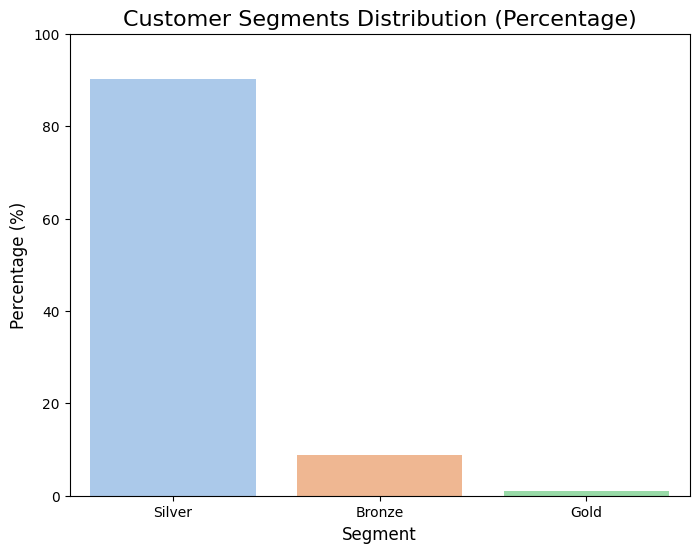

Segment
Silver    90.179945
Bronze     8.793279
Gold       1.026776
Name: count, dtype: float64


In [16]:
from datetime import datetime

# Konversi tanggal dan hitung Recency
final_data['order_date'] = pd.to_datetime(final_data['order_date'])
current_date = datetime(2024, 11, 15)
final_data['Recency'] = (current_date - final_data['order_date']).dt.days

# Periksa keberadaan kolom Customer_ID
if 'sales_key' not in final_data.columns:
    raise KeyError("Kolom 'sales_key' tidak ditemukan dalam dataframe. Periksa struktur data!")

# Menghitung Frequency jika kolom tidak ada
if 'Frequency' not in final_data.columns:
    # Hitung jumlah transaksi per pelanggan
    final_data['Frequency'] = final_data.groupby('sales_key')['order_date'].transform('count')

# Fungsi untuk menghitung skor Recency
def calculate_recency_score(recency):
    if recency <= 1800:
        return 3
    elif recency <= 2400:
        return 2
    else:
        return 1

# Fungsi untuk menghitung skor Frequency
def calculate_frequency_score(frequency):
    if frequency >= 3:
        return 3
    elif frequency == 2:
        return 2
    else:
        return 1

# Fungsi untuk menghitung skor Monetary
def calculate_monetary_score(monetary):
    if monetary >= 5000:
        return 3
    elif monetary >= 3000:
        return 2
    else:
        return 1

# Hitung skor untuk masing-masing kolom
final_data['R_Score'] = final_data['Recency'].apply(calculate_recency_score)
final_data['F_Score'] = final_data['Frequency'].apply(calculate_frequency_score)
final_data['M_Score'] = final_data['sales'].apply(calculate_monetary_score)

# Hitung total skor
final_data['RFM_Score'] = final_data['R_Score'] + final_data['F_Score'] + final_data['M_Score']

# Fungsi untuk menentukan segmen
def assign_segment(score):
    if score >= 7:
        return 'Gold'
    elif score >= 4:
        return 'Silver'
    else:
        return 'Bronze'

# Tentukan segmen berdasarkan skor total
final_data['Segment'] = final_data['RFM_Score'].apply(assign_segment)

# Hasil akhir
print(final_data[['sales_key', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'Segment']])

# Hitung jumlah pelanggan di setiap segmen
segment_counts = final_data['Segment'].value_counts()

# Tampilkan hasilnya
print(segment_counts)

# Hitung total pelanggan
total_customers = segment_counts.sum()

# Hitung persentase untuk setiap segmen
segment_percentages = (segment_counts / total_customers) * 100

# Membuat barchart untuk persentase pelanggan di setiap segmen
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_percentages.index, y=segment_percentages.values, palette="pastel")
plt.title('Customer Segments Distribution (Percentage)', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 100)  # Batas sumbu Y hingga 100%
plt.show()

# Tampilkan persentase dalam format tabel
print(segment_percentages)



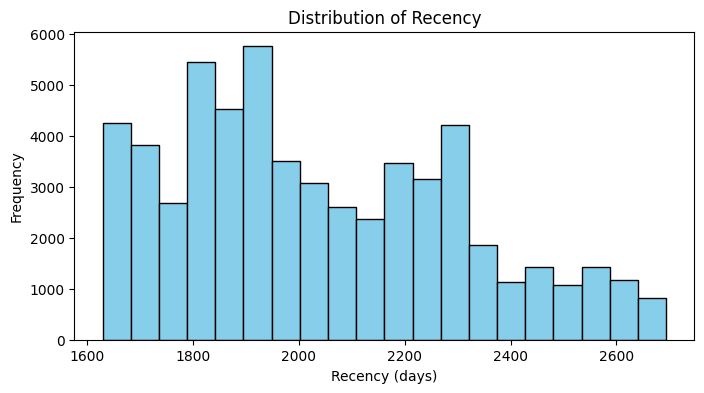

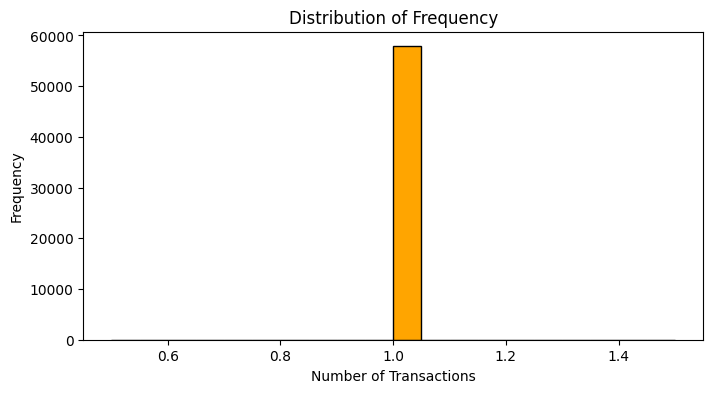

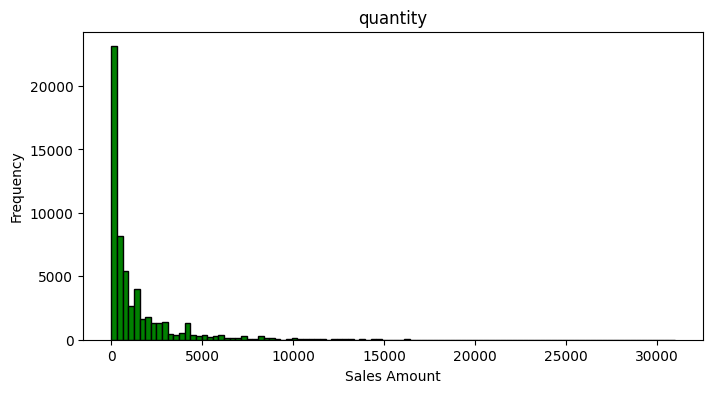

In [17]:
import matplotlib.pyplot as plt

# Histogram untuk Recency
plt.figure(figsize=(8, 4))
plt.hist(final_data['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

# Histogram untuk Frequency
plt.figure(figsize=(8, 4))
plt.hist(final_data['Frequency'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

# Histogram untuk Sales
plt.figure(figsize=(8, 4))
plt.hist(final_data['sales'], bins=100, color='green', edgecolor='black')
plt.title('quantity')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


In [18]:
# Filter data dengan profit negatif
negative_profit_data = final_data[final_data['profit'] < 0]

# Hapus duplikat kombinasi negara dan produk
unique_negative_products = negative_profit_data[['country', 'product_name']].drop_duplicates()

# Hitung jumlah produk dengan profit negatif per negara
negative_product_count = unique_negative_products.groupby('country')['product_name'].count()

# Tampilkan hasil
print("Jumlah produk dengan profit negatif per negara:")
print(negative_product_count)

# Filter data dengan profit positif
positive_profit_data = final_data[final_data['profit'] >= 0]

# Hapus duplikat kombinasi negara dan produk
unique_positive_products = positive_profit_data[['country', 'product_name']].drop_duplicates()

# Hitung jumlah produk dengan profit negatif per negara
positive_product_count = unique_positive_products.groupby('country')['product_name'].count()

# Tampilkan hasil
print("Jumlah produk dengan profit positif per negara:")
print(positive_product_count)

Jumlah produk dengan profit negatif per negara:
country
Australia          33
Canada             98
France             79
Germany            61
United Kingdom     83
United States     102
Name: product_name, dtype: int64
Jumlah produk dengan profit positif per negara:
country
Australia          85
Canada            186
France            157
Germany           100
United Kingdom    162
United States     189
Name: product_name, dtype: int64
